# Life Expectancy vs. GDP of Countries

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [90]:
df = pd.read_csv('all_data.csv')

### Exploratory Analysis

In [91]:
df.head(3)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10


In [16]:
df.shape

(96, 4)

There are 96 entries and 4 columns; Country, Year, Life expectancy at birth in years, and GDP.

In [18]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


There are six countries included in this dataset, listed above.

In [19]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Every year from 2000 to 2015 is included in this dataset.

In [21]:
df = df.rename({"Life expectancy at birth (years)":"LEAB"}, axis= 'columns')

In [22]:
print(df.describe())

              Year       LEAB           GDP
count    96.000000  96.000000  9.600000e+01
mean   2007.500000  72.789583  3.880499e+12
std       4.633971  10.672882  5.197561e+12
min    2000.000000  44.300000  4.415703e+09
25%    2003.750000  74.475000  1.733018e+11
50%    2007.500000  76.750000  1.280220e+12
75%    2011.250000  78.900000  4.067510e+12
max    2015.000000  81.000000  1.810000e+13


The average life expectancy at birth from the six countries in these data from 2000 through 2015 is 72.8 years with an average of $3.88 trillion GDP.

### Plotting the Data

In [23]:
dfMeans = df.drop("Year", axis=1).groupby("Country").mean().reset_index()

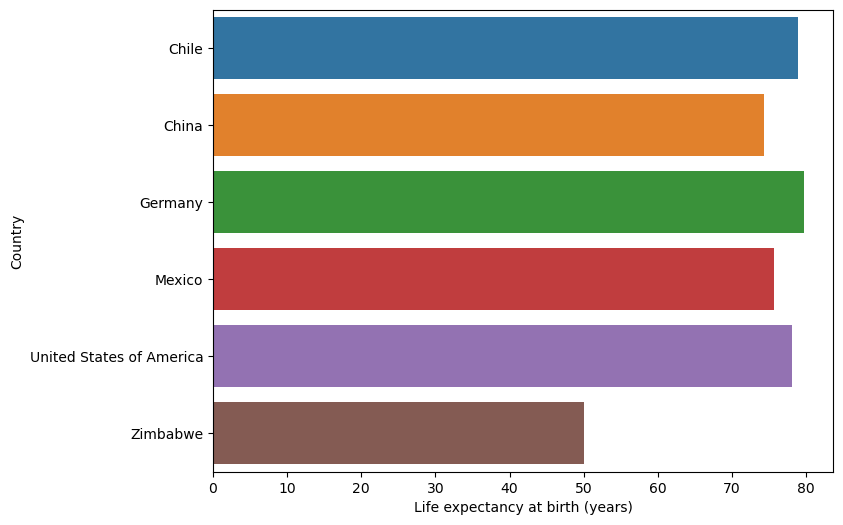

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEAB", y="Country", data=dfMeans)
plt.xlabel("Life expectancy at birth (years)");

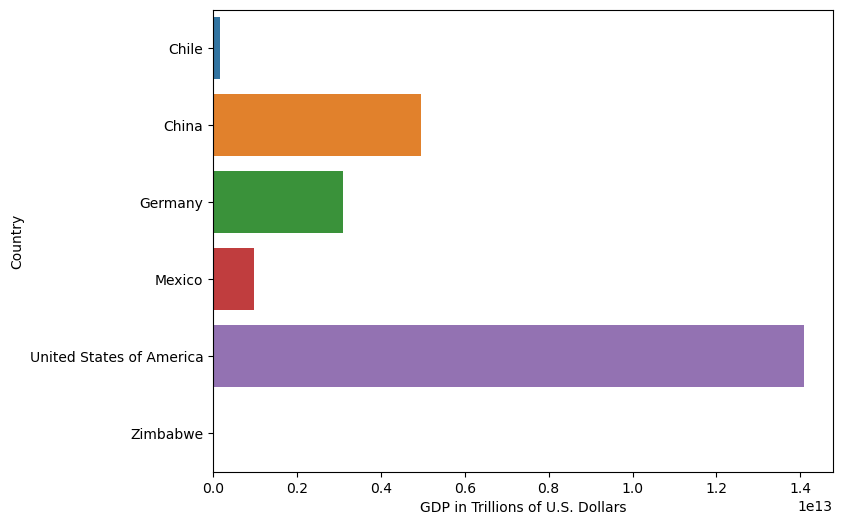

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x='GDP', y="Country", data=dfMeans)
plt.xlabel("GDP in Trillions of U.S. Dollars");

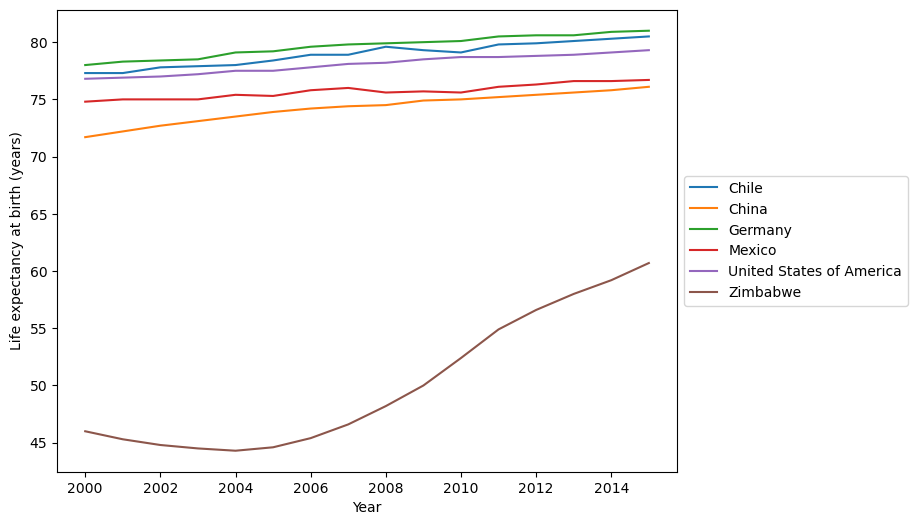

In [32]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEAB, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Life expectancy at birth (years)");

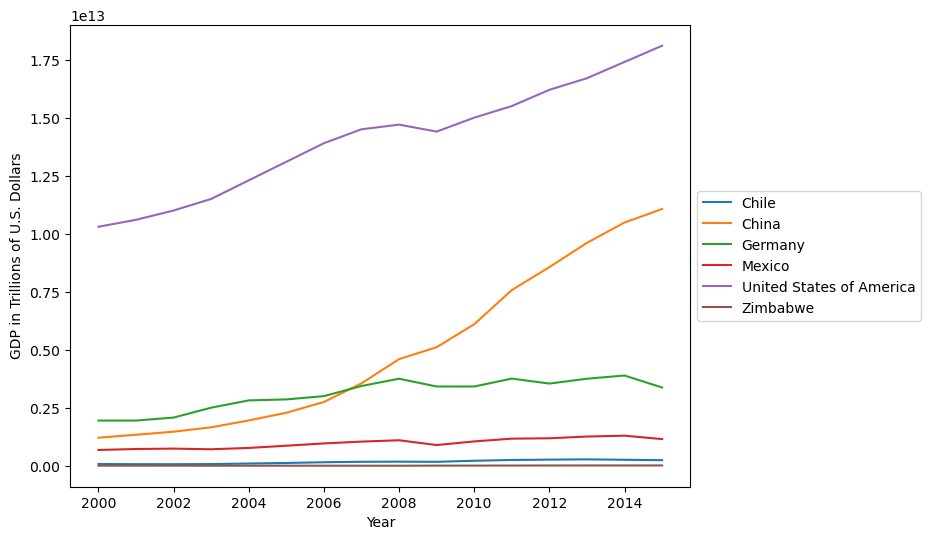

In [29]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("GDP in Trillions of U.S. Dollars");

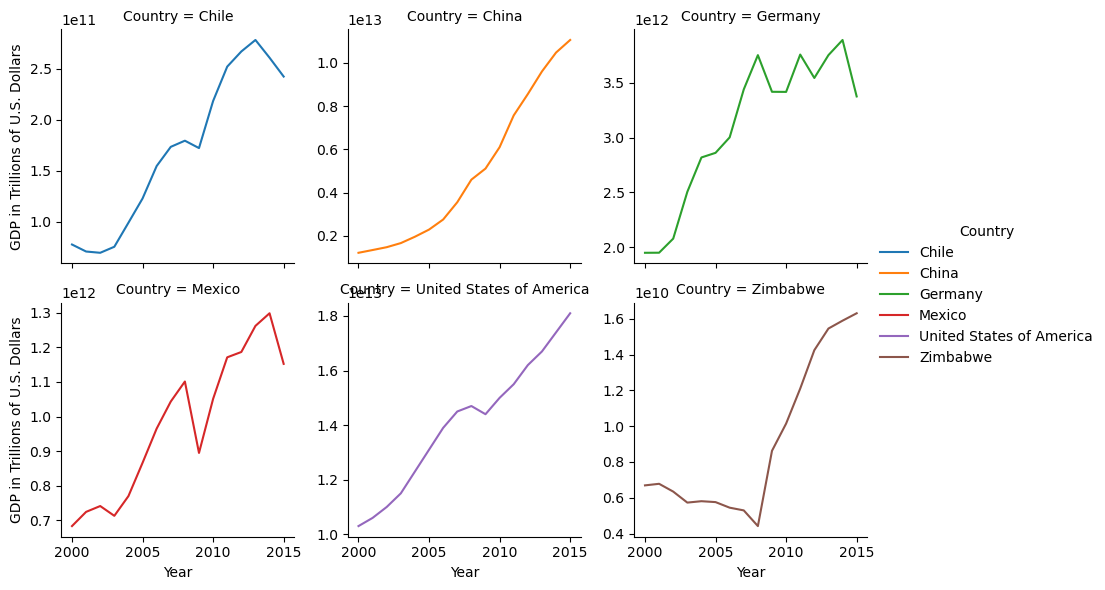

In [47]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

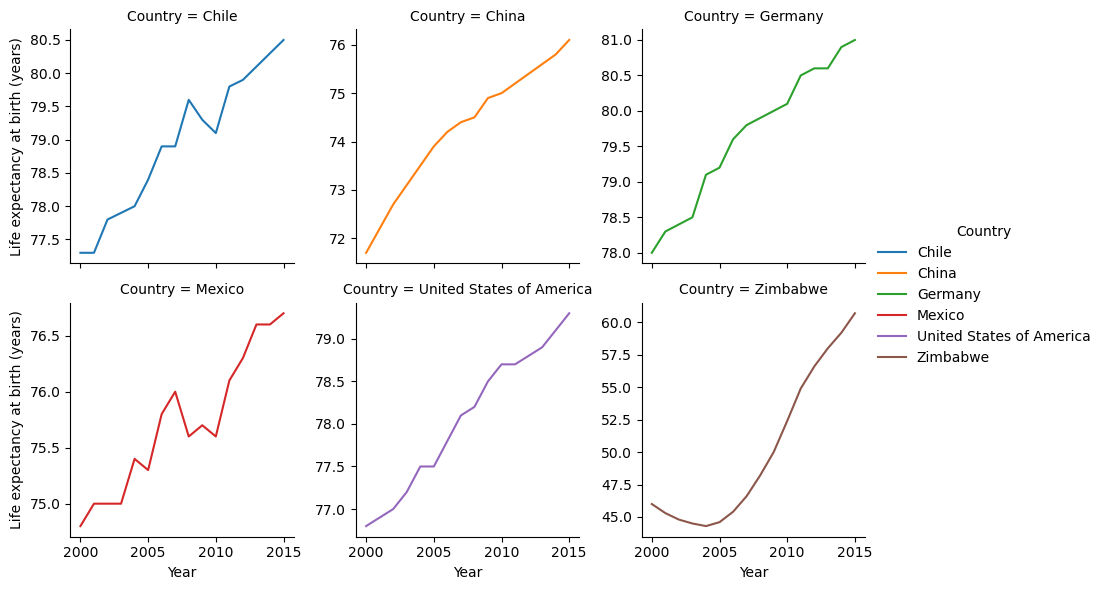

In [49]:
graphLEAB = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEAB = (graphLEAB.map(sns.lineplot,"Year","LEAB")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEAB;

In [66]:
df[(df.Year == 2000) | (df.Year == 2015)]

,Country,Year,LEAB,GDP
0,Chile,2000,77.3,7.786093e+10
15,Chile,2015,80.5,2.425180e+11
16,China,2000,71.7,1.211350e+12
31,China,2015,76.1,1.106470e+13
32,Germany,2000,78.0,1.949950e+12
47,Germany,2015,81.0,3.375610e+12
48,Mexico,2000,74.8,6.836480e+11
63,Mexico,2015,76.7,1.152260e+12
64,United States of America,2000,76.8,1.030000e+13
79,United States of America,2015,79.3,1.810000e+13


From this dataset, we can see that all six countries have seen an increase in both their GDP and life expectancy at birth (LEAB). The most significant change in life expectancy at birth has been the increase from 2000 and 2015 in Zimbabwe. Most countries have  about a 3 year increase in LEAB (China with ~5) compared to ~15 year difference in Zimbabwe.